In [ ]:
#This Program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#to predict the closing stock price of Apple Inc. using past 60 days stock price

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [ ]:
# Getting the stock quote
df = yf.download('GOOGL', start='2012-01-01',end = '2023-07-19')
# data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.339840,16.720470,16.325577,16.651901,16.651901,146912940
2012-01-04,16.642391,16.773024,16.532032,16.723724,16.723724,114445440
2012-01-05,16.569820,16.615866,16.422173,16.491741,16.491741,131184684
2012-01-06,16.495245,16.516518,16.261011,16.266768,16.266768,107608284
2012-01-09,16.178679,16.191191,15.546296,15.577077,15.577077,232671096
...,...,...,...,...,...,...
2023-07-12,118.800003,120.330002,118.410004,118.930000,118.930000,30404400
2023-07-13,120.930000,124.830002,120.449997,124.540001,124.540001,44297900
2023-07-14,124.800003,126.779999,123.489998,125.419998,125.419998,33266800


In [ ]:
df.shape

(2903, 6)

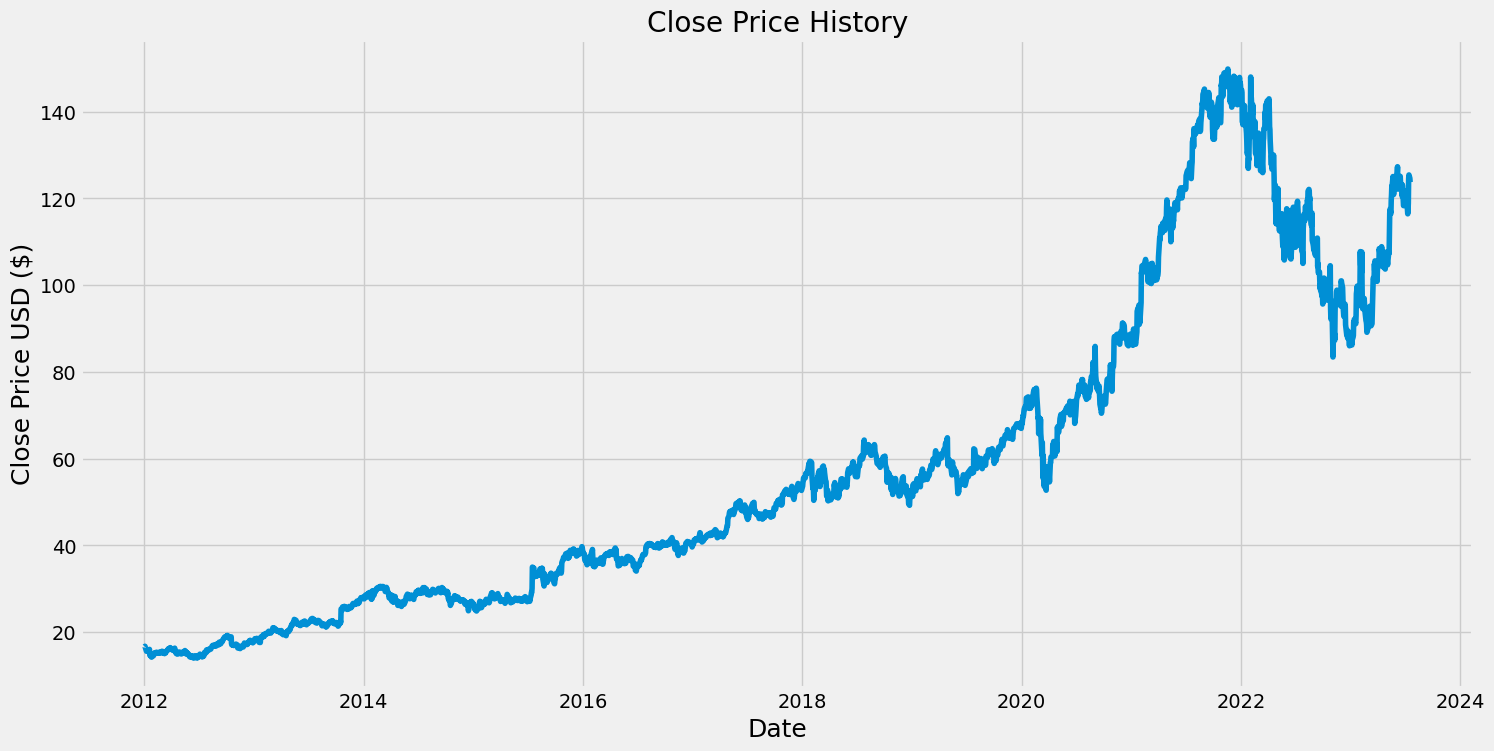

In [ ]:
# visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
# new dataframe with only close column
data = df.filter(['Close'])
# converting dataframe to numpy array
dataset = data.values

# getting the number of rows to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len



2323

In [ ]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0195929 ],
       [0.0201216 ],
       [0.01841394],
       ...,
       [0.82025163],
       [0.81458357],
       [0.80803215]])

In [ ]:
# creating the scaled training data set
train_data = scaled_data[0:training_data_len,:]

# splitting the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    # sample of X_train and y_train
    print(X_train)
    print(y_train)



[array([0.0195929 , 0.0201216 , 0.01841394, 0.01675787, 0.01168095,
       0.01180622, 0.0123257 , 0.0130036 , 0.01214701, 0.01280834,
       0.01360598, 0.01483283, 0.0049627 , 0.00487612, 0.00403059,
       0.00192319, 0.00166713, 0.00385558, 0.00343373, 0.00387953,
       0.00401216, 0.00480059, 0.00686746, 0.00921802, 0.00879065,
       0.00935803, 0.00965461, 0.00863223, 0.00979092, 0.00934145,
       0.00856775, 0.00874459, 0.00839828, 0.01012251, 0.00900618,
       0.00866907, 0.00936724, 0.00925855, 0.01093121, 0.01090541,
       0.0116699 , 0.01145805, 0.01016857, 0.00845722, 0.00879618,
       0.00885881, 0.00758958, 0.00849223, 0.01081883, 0.01048909,
       0.01143595, 0.01215622, 0.01380308, 0.01371282, 0.01490837,
       0.01602654, 0.01538917, 0.01663075, 0.01620523, 0.01781524])]
[0.01646128229973394]


In [ ]:
# converting X_train and y_train to numpy arrays
X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
# reshaping the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2263, 60, 1)

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# model compilation
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# training the model
model.fit(X_train,y_train,batch_size=1,epochs=1)

2263/2263 [==============================] - 95s 36ms/step - loss: 4.1382e-04


In [ ]:
# testing data set

test_data = scaled_data[training_data_len - 60:,:]

# creating datasets X_test and y_test
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [ ]:
# converting the data to numpy array
X_test = np.array(X_test)

In [ ]:
# reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
# predicted values of model
predictions = model.predict(X_test)
# unscaling the data
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 2s 25ms/step


In [ ]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse


3.5116679744834394

<ipython-input-19-742e8d77c45f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


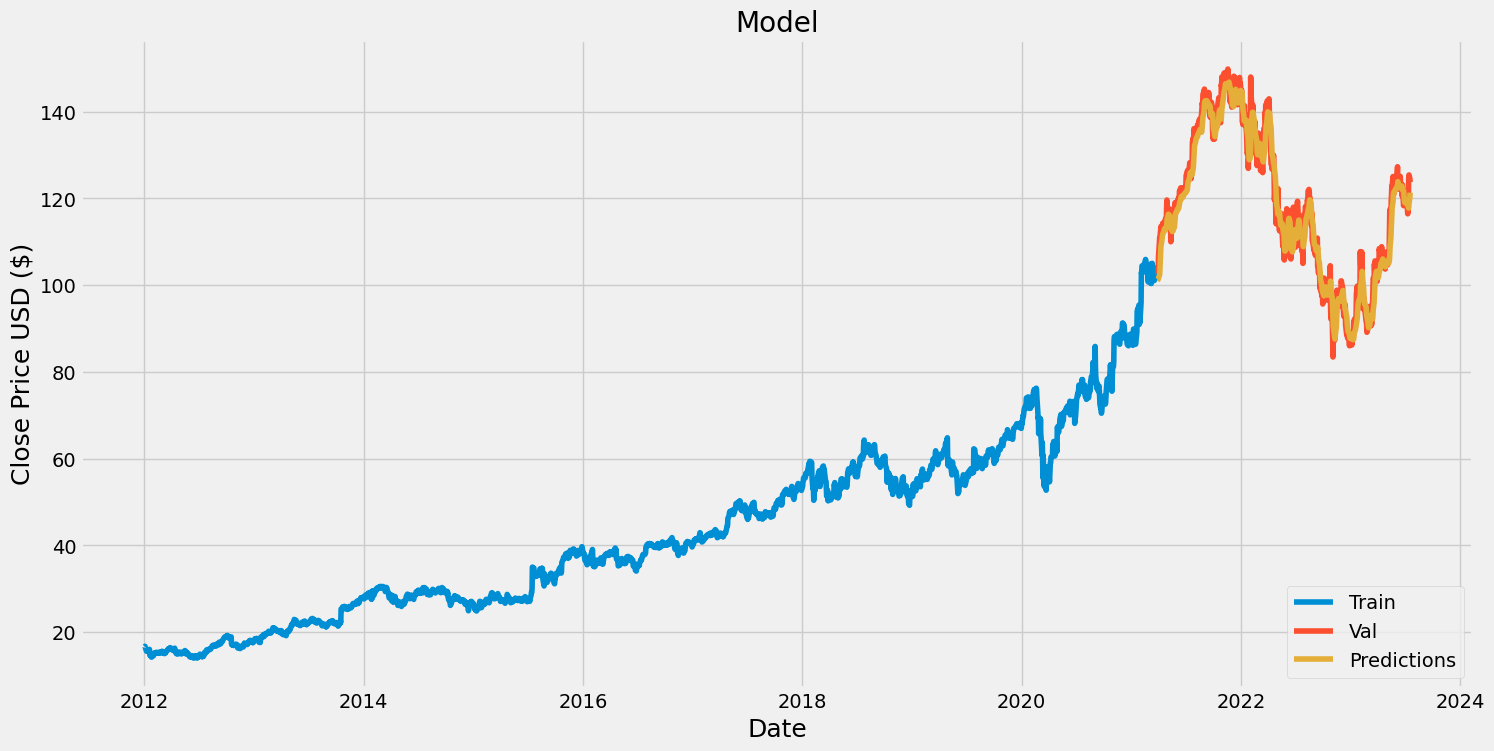

In [ ]:
# plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-03-29,102.289497,101.171120
2021-03-30,102.323502,101.217819
2021-03-31,103.125999,101.339073
2021-04-01,106.488998,101.609871
2021-04-05,110.947998,102.474365
...,...,...
2023-07-12,118.930000,117.995346
2023-07-13,124.540001,117.768768
2023-07-14,125.419998,118.731949


In [ ]:
# getting the quote
google_quote = yf.download('GOOGL', start='2012-01-01',end = '2023-07-20')
# creating new dataframe
new_df = google_quote.filter(['Close'])
# getting the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# scaling the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#  creating an empty list
X_test = []
# append the past 60 days
X_test.append(last_60_days_scaled)
# convert the X_test data set to a numpy array
X_test = np.array(X_test)
# reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# predicted scaled price
pred_price = model.predict(X_test)
# unscaling the data
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 26ms/step
[[122.234924]]


In [ ]:
# google quote
google_quote_2 = yf.download('GOOGL', start='2023-07-19',end = '2023-07-20')
print(google_quote_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-07-19    122.029999
Name: Close, dtype: float64


In [ ]:
# predicted value is very close to the original value